In [315]:
# Dependencies
import json
import tweepy
import apikeys
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Twitter API Keys
consumer_key = apikeys.TWITTER_CONSUMER_KEY
consumer_secret = apikeys.TWITTER_CONSUMER_SECRET
access_token = apikeys.TWITTER_ACCESS_TOKEN
access_token_secret = apikeys.TWITTER_ACCESS_TOKEN_SECRET

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Search Term
target_users = ['nytimes', 'BBCWorld', 'CBSNews', 'CNN', 'FoxNews']

outlet_tweet_dict = {}

for each in target_users:
    outlet_tweet_dict[each] = ""
    tweet_text_values = []
    for page_num in range(5):
    
        public_tweets = api.user_timeline(each, page=page_num)
        #print(json.dumps(public_tweets, sort_keys=True, indent=4))

        for tweet in public_tweets:
            scores = analyzer.polarity_scores(tweet['text'])
            #print(tweet["text"])
            tweet_text_values.append(scores['compound'])
            
    outlet_tweet_dict[each] = tweet_text_values
    #print(len(tweet_texts))
    print(len(outlet_tweet_dict))

1
2
3
4
5


In [316]:
# for k,v in outlet_tweet_dict.items():
#     blah = v[0]
#     print(blah)
#     break

In [317]:
outlet_tweet_dict_df = pd.DataFrame(outlet_tweet_dict)
outlet_tweet_dict_df.head()

,BBCWorld,CBSNews,CNN,FoxNews,nytimes
0,0.00,0.8360,0.00,0.3612,0.0000
1,0.00,0.0000,0.00,0.0000,0.0000
2,0.00,0.4927,0.00,-0.7126,0.6124
3,-0.34,0.0000,-0.25,0.0000,0.0000
4,-0.34,0.0000,0.00,-0.5267,0.0000


In [318]:
outlet_rev_df = outlet_tweet_dict_df.iloc[::-1].reset_index()
outlet_rev_df.head()

,index,BBCWorld,CBSNews,CNN,FoxNews,nytimes
0,99,0.3400,0.0772,0.3400,0.0258,-0.0772
1,98,-0.5859,0.0000,-0.3182,0.3034,-0.7964
2,97,-0.6597,0.0000,0.4019,0.0000,0.4019
3,96,0.0000,-0.7351,0.0000,-0.3182,-0.5994
4,95,0.3182,-0.5106,0.3818,0.0000,-0.5574


In [319]:
# plt.scatter(outlet_rev['index'], outlet_rev['BBCWorld'], marker="o", 
#             facecolors="red", edgecolors="black", alpha=0.95, s=30)

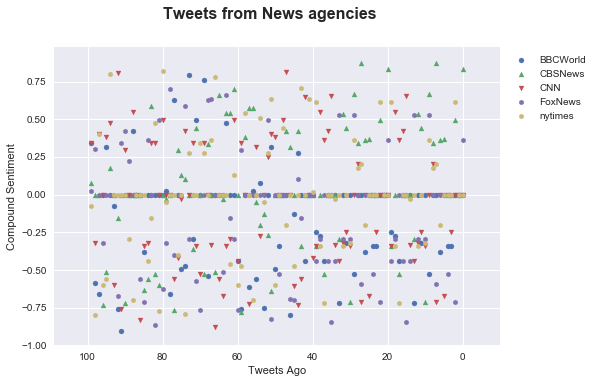

In [320]:

fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Tweets from News agencies", fontsize=16,
             fontweight="bold")

ax1.set_xlim(max(outlet_rev_df['index'])+10, min(outlet_rev_df['index'])-10, 10)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['BBCWorld'], marker="o", s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['CBSNews'], marker='^', s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['CNN'], marker="v", s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['FoxNews'], marker='h', s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['nytimes'], marker='h', s=25)
ax1.set_ylabel("Compound Sentiment")
ax1.set_xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', ncol=1)
#plt.legend()
#plt.xticks(range(len(outlet_rev['index'])), outlet_rev['index'])
plt.show()


In [321]:
outlet_compound_total = {}
outlet_compound_total_list = []
for outlet in outlet_tweet_dict:
    outlet_compound_total[outlet] = [sum(outlet_tweet_dict[outlet])]
    outlet_compound_total_list.append(sum(outlet_tweet_dict[outlet]))
#print(outlet_compound_total)
#print(outlet_compound_total_list)

In [322]:
outlet_compound_df = pd.DataFrame(outlet_compound_total)
outlet_compound_df

,BBCWorld,CBSNews,CNN,FoxNews,nytimes
0,-13.386,4.3128,-5.1273,-11.4011,-0.7369


In [323]:
outlet_compound_trans = outlet_compound_df.transpose().rename(columns={0:"Compound Sentiment Total"}).reset_index().rename(columns={"index":"Outlets"})
outlet_compound_trans

,Outlets,Compound Sentiment Total
0,BBCWorld,-13.3860
1,CBSNews,4.3128
2,CNN,-5.1273
3,FoxNews,-11.4011
4,nytimes,-0.7369


In [324]:
# outlet_bar_chart = outlet_compound_trans.plot(kind="bar", color=["b","g",'r'])
# outlet_bar_chart.set_title("Outlet Compound Sentiment Totals")
# outlet_bar_chart.set_xlabel("News Outlets")
# outlet_bar_chart.set_ylabel("Compound Sentiment Totals")
# plt.show()

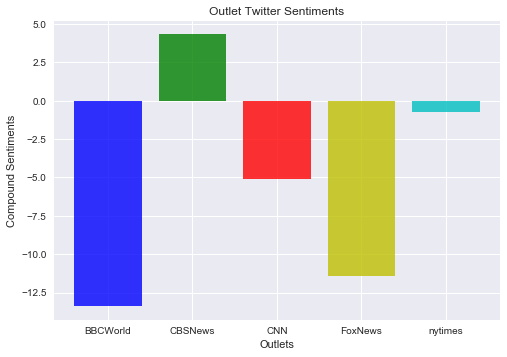

In [325]:

x_values = np.arange(len(target_users))
y_values = outlet_compound_trans['Compound Sentiment Total']
plt.bar(x_values, y_values, color='b''g''r''y''c', alpha=.8, tick_label=outlet_compound_trans['Outlets'])
plt.title("Outlet Twitter Sentiments")
plt.xlabel("Outlets")
plt.ylabel("Compound Sentiments")
plt.show()